In [25]:
pip install urllib3


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [64]:
import requests
import pandas as pd
import numpy as np
import sys
import urllib.parse
import matplotlib.pyplot as plt

In [27]:
key = "5bb3639a-ef5a-11ed-8b7f-0242ac130002-5bb363fe-ef5a-11ed-8b7f-0242ac130002"
BASE_URL = 'https://api.stormglass.io/v2/'

# Coordinates for Lagoa do Cauipe
lat = -3.591632
lon = -38.776946

In [54]:
def get_wind_speed(lat,lon):

    url = urllib.parse.urljoin(BASE_URL,'weather/point')

    response = requests.get(
      url,
      params={
        'lat': lat,
        'lng': lon,
        'params': 'windSpeed',
      },
      headers={
        'Authorization': key
      }
    )
    
    #Getting a pandas df for the response
    data_df = pd.DataFrame(response.json()['hours'])
    
    #Getting the values contained in the windSPeed dict and then converting them from m/s to knots
    data_df['noaa'] = data_df.apply(lambda row: row.windSpeed['noaa'], axis=1)
    data_df['sg'] = data_df.apply(lambda row: row.windSpeed['sg'], axis=1)
    data_df['noaa_knots'] = data_df.apply(lambda row: row.noaa * 1.94384, axis=1)
    data_df['sg_knots'] = data_df.apply(lambda row: row.sg * 1.94384, axis=1)
    
    return data_df 

In [57]:
#Retrieve wind values for Lagoa do Cauipe (lat and lon provided above)
wind_cauipe = get_wind_speed(lat,lon)

In [58]:
wind_cauipe

,time,windSpeed,noaa,sg,noaa_knots,sg_knots
0,2023-05-10T00:00:00+00:00,"{'icon': 3.87, 'noaa': 2.3, 'sg': 3.87}",2.30,3.87,4.470832,7.522661
1,2023-05-10T01:00:00+00:00,"{'icon': 3.77, 'noaa': 2.05, 'sg': 3.77}",2.05,3.77,3.984872,7.328277
2,2023-05-10T02:00:00+00:00,"{'icon': 3.67, 'noaa': 1.79, 'sg': 3.67}",1.79,3.67,3.479474,7.133893
3,2023-05-10T03:00:00+00:00,"{'icon': 3.57, 'noaa': 1.54, 'sg': 3.57}",1.54,3.57,2.993514,6.939509
4,2023-05-10T04:00:00+00:00,"{'icon': 3.71, 'noaa': 1.68, 'sg': 3.71}",1.68,3.71,3.265651,7.211646
...,...,...,...,...,...,...
236,2023-05-19T20:00:00+00:00,"{'noaa': 3.37, 'sg': 3.37}",3.37,3.37,6.550741,6.550741
237,2023-05-19T21:00:00+00:00,"{'noaa': 3.16, 'sg': 3.16}",3.16,3.16,6.142534,6.142534
238,2023-05-19T22:00:00+00:00,"{'noaa': 3.08, 'sg': 3.08}",3.08,3.08,5.987027,5.987027
239,2023-05-19T23:00:00+00:00,"{'noaa': 3.0, 'sg': 3.0}",3.00,3.00,5.831520,5.831520


In [74]:
wind_cauipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        241 non-null    object 
 1   windSpeed   241 non-null    object 
 2   noaa        241 non-null    float64
 3   sg          241 non-null    float64
 4   noaa_knots  241 non-null    float64
 5   sg_knots    241 non-null    float64
dtypes: float64(4), object(2)
memory usage: 11.4+ KB


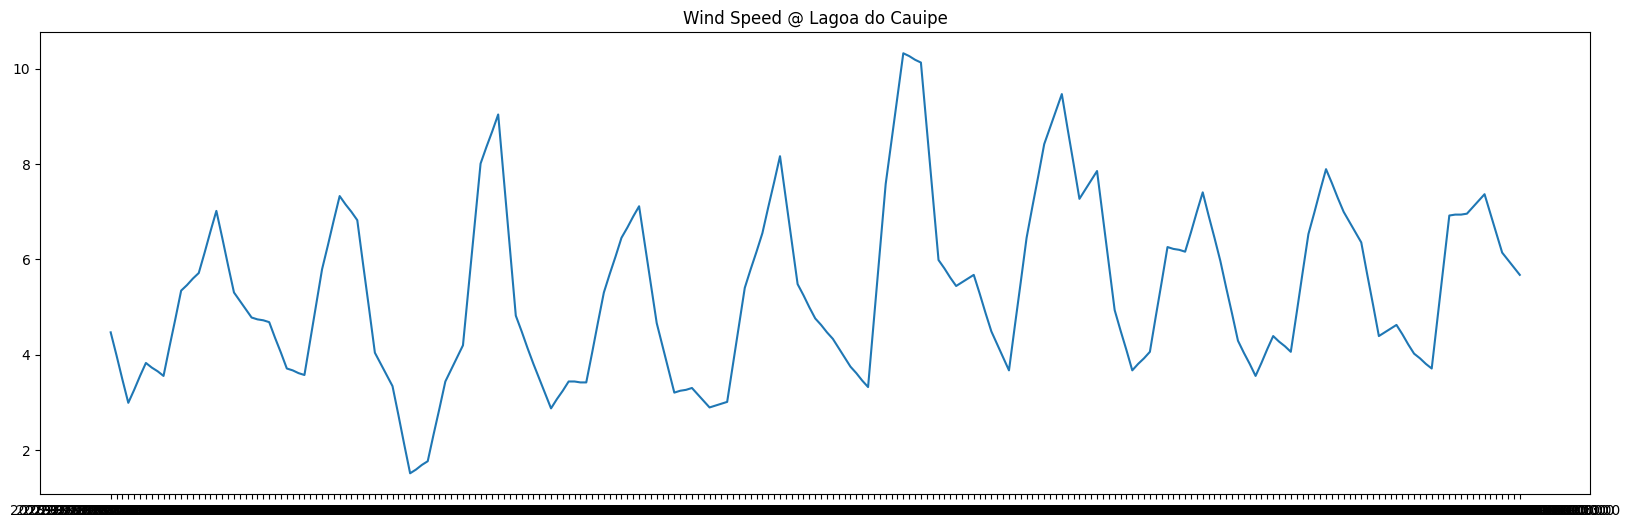

In [71]:
x = wind_cauipe['time']
y = wind_cauipe['noaa_knots']
plt.figure(figsize=(20,6))
plt.title("Wind Speed @ Lagoa do Cauipe")
plt.plot(x,y)
plt.show()